<a href="https://colab.research.google.com/github/GuilhermeAnjosFernandes/airbnb_vancouver/blob/main/Analisando_os_Dados_do_Airbnb_Vancouver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Vancouver*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à Vancouver, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/bc/vancouver/2021-08-08/visualisations/listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel 
* `name` - nome da propriedade anunciada
* `host_id` - número do id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group`- esta coluna não tem nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude`- coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price`- preço para akugar o imóvel
* `minimum_nights` - quantidade mínima de noites para alugar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário
* `availability_365` - números de dias de disponibilidade dentro de 365 dias

**Informação adicional**

* **CAD** - Dólar Canadense

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28872,-123.12046,Entire home/apt,158,90,16,2015-09-06,0.27,41,365
1,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,85,30,430,2019-08-04,4.30,1,61
2,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,140,30,89,2020-10-31,3.84,1,197
3,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2017-07-28,0.57,1,34
4,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,211,3,5,2018-08-26,0.14,1,342


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entrada que nosso conjunto de dados possuie realizar uma análise inicial dos tipos de dados de cada coluna.

In [4]:
# identificar o volume de dados do DataFrame
print('Entradas: \t {}'.format(df.shape[0]))
print('Variáveis: \t {} \n'.format(df.shape[1]))

# verificar os tipos de dados das variáveis
display(df.dtypes)

Entradas: 	 4380
Variáveis: 	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* esta diretamente relacionada a qualidade dos dados. É importante saber logo no início se esses valores nulos são significativos comparados ao total de entradas.

* Podemos observar que a coluna `neighbourhood_group` possui 100% dos seus valores ausentes.
* As variáveis `reviews_per_month` e `last_review` tem quase 19% dos valores ausentes.
* A variável `host_name` apresenta menos de 1% de dados ausentes.



In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.189041
last_review                       0.189041
host_name                         0.000913
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

Para o nosso trabalho em questão, as variáveis acima que apresentaram valores ausentes, não farão diferença para a nossa análise.

Caso fosse necessário, o tratamento desses dados ausentes seria realizado de outra forma.

Conforme as boas práticas, como a variável `neighbourhood_group` possui 100% dos seus dados ausentes, toda a sua coluna será apagada.

Em relação a `reviews_per_month` e `last_review`, não parecem ter algun tipo de relação entre elas, e não aprecem ter grande poder preditivo. Mais uma vez vamos fazer a exclusão, mas dessa vez, vamos excluir as entradas

In [6]:
# excluindo as colunas 'neighbourhood_group', 'reviews_per_month' e 'last_review'
df.drop(columns=['neighbourhood_group', 'reviews_per_month', 'last_review'], inplace = True)

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para verificar a possível presença de ***outliers***, vamos verificar a distribuição das variáveis através de histrogramas.

**OUTLIERS** são pontos discrepantes, que estão destoando do padrão do conjunto de dados.

É muito importante conseguir identificar e tratar esses outliers, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.


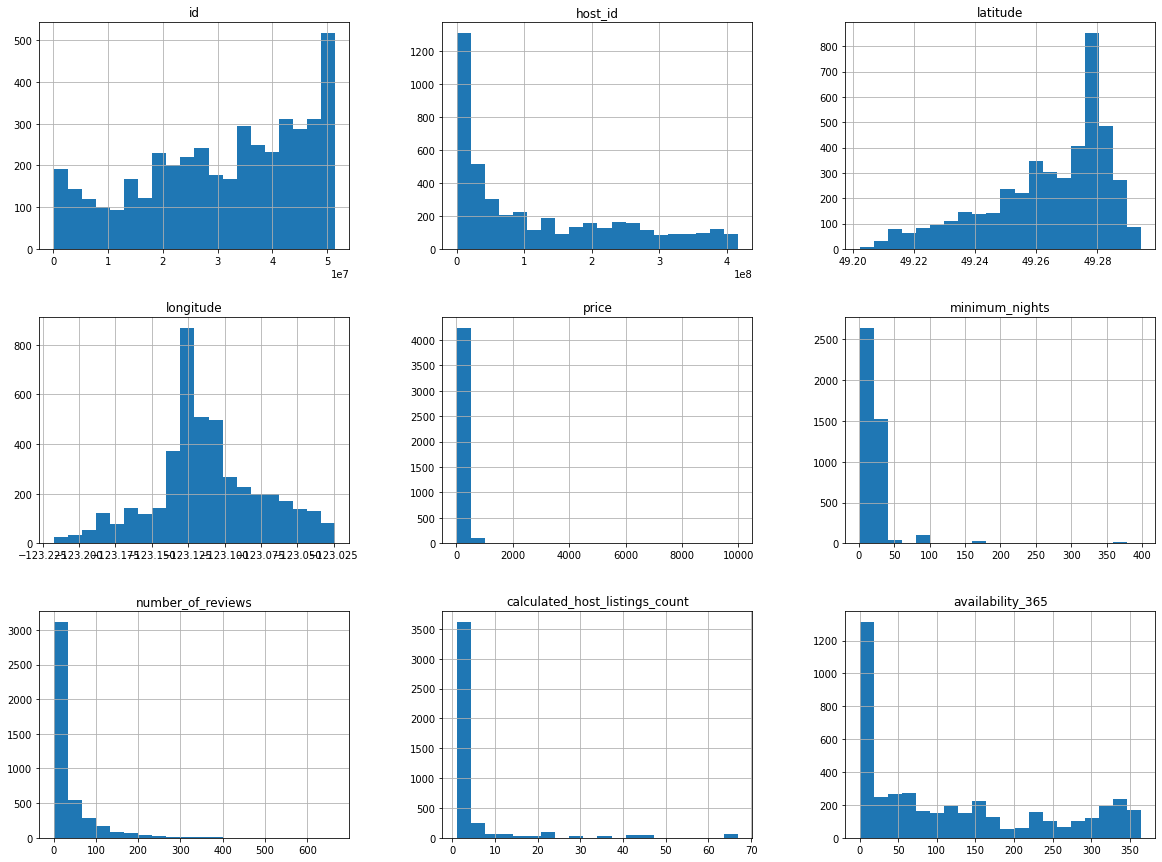

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(20,15));

### **Q4. Há *outliers* presentes?**

Analisando os gráficos acima, pela distribuição dos histogramas podemos observar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.
Os valores não seguem uma distribuição, e distorcem toda a representação gráfica.

Para reforçar essa análise, vamos realizar um resumo estatístico das variáveis e plotar boxplots para uma melhor visualização.

In [8]:
# ver resumo estatísticos das variáveis numéricas
df[['price', 'minimum_nights', 'calculated_host_listings_count']].describe()

,price,minimum_nights,calculated_host_listings_count
count,4380.000000,4380.000000,4380.000000
mean,192.499543,18.286986,4.978995
std,303.726258,33.906324,10.975133
min,13.000000,1.000000,1.000000
25%,92.000000,2.000000,1.000000
50%,139.000000,4.000000,1.000000
75%,224.000000,30.000000,3.000000
max,9999.000000,399.000000,67.000000


Através do resumo estatístico, podemos observar:

* A variável `price`, que trata o preço das diárias dos imóveis em moeda local (**CAD**), mostra valor máximo de **CAD** 999.000 já indicando uma distorção, pois 75% do valor encontra-se abaixo de **CAD** 224.000.
* Situação parecida na variável `minimum_nights`, onde o valor máximo de 399 dias surge, quando 75% dos valores são menores ou igual a 30 dias.

* O valor máximo da variável `calculated_host_listings_count` também se encontra bastante acima da média, considerando que o 75% dos valores é igual ou menor do que 3 propriedades por anfitrião. 

#### Boxplot para `price`

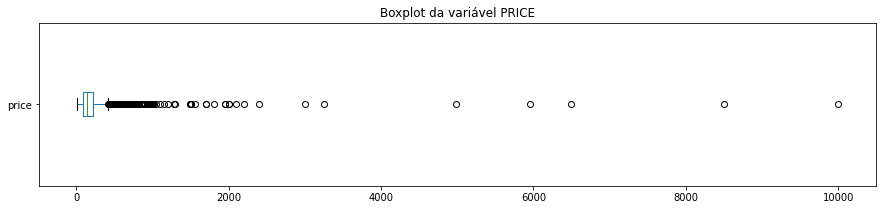


price: valores acima de 422
255 entradas
5.8219%


In [36]:
# criar o boxplor da variável 'price'
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.title('Boxplot da variável PRICE')
plt.show()

# ver quantidade de valores acima de 422 para 'price' - Valor encontrado através do cálculo do IQR
print("\nprice: valores acima de 422")
print("{} entradas".format(len(df[df.price > 422])))
print("{:.4f}%".format((len(df[df.price > 422]) / df.shape[0])*100))

#### Boxplot para `minimum_nights`

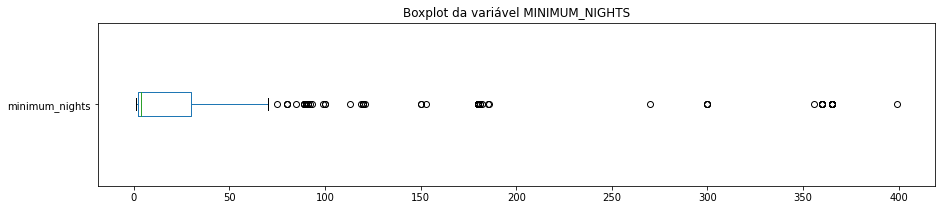

minimum_nights: valores acima de 72:
167 entradas
3.8128%


In [37]:
# criar o bloxplot da variável 'minimun_nights'
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.title('Boxplot da variável MINIMUM_NIGHTS')
plt.show()

# ver quantidade de valores acima de 72 dias para 'minimum_nights' - Valor encontrado através do cálculo do IQR
print("minimum_nights: valores acima de 72:")
print("{} entradas".format(len(df[df.minimum_nights > 72])))
print("{:.4f}%".format((len(df[df.minimum_nights > 72]) / df.shape[0])*100))

#### Boxplot para `calculated_host_listings_count`

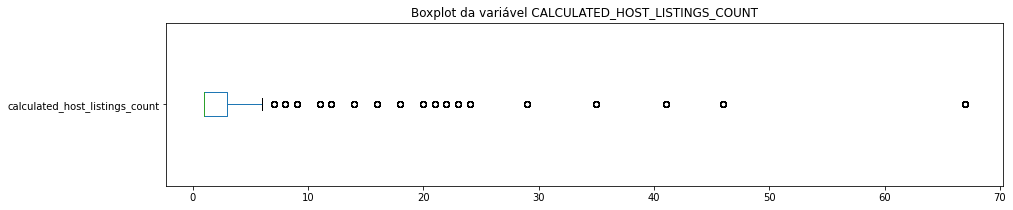

calculated_host_listings_count: valores acima de 6:
547 entradas
12.4886%


In [40]:
# criar o boxplot da variável 'calculated_host_listings_count'
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.title('Boxplot da variável CALCULATED_HOST_LISTINGS_COUNT')
plt.show()


# ver quantidade de valores acima de 6 anfitriões para 'calculated_host_listings_count' - Valor encontrado através do cálculo do IQR
print("calculated_host_listings_count: valores acima de 6:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 6])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 6]) / df.shape[0])*100))



Após a identidficação dos *outliers*, vamos realizar a remoção desses dados e plotar novamente o histograma.

In [43]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 422].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 72].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 6].index, axis=0, inplace=True)

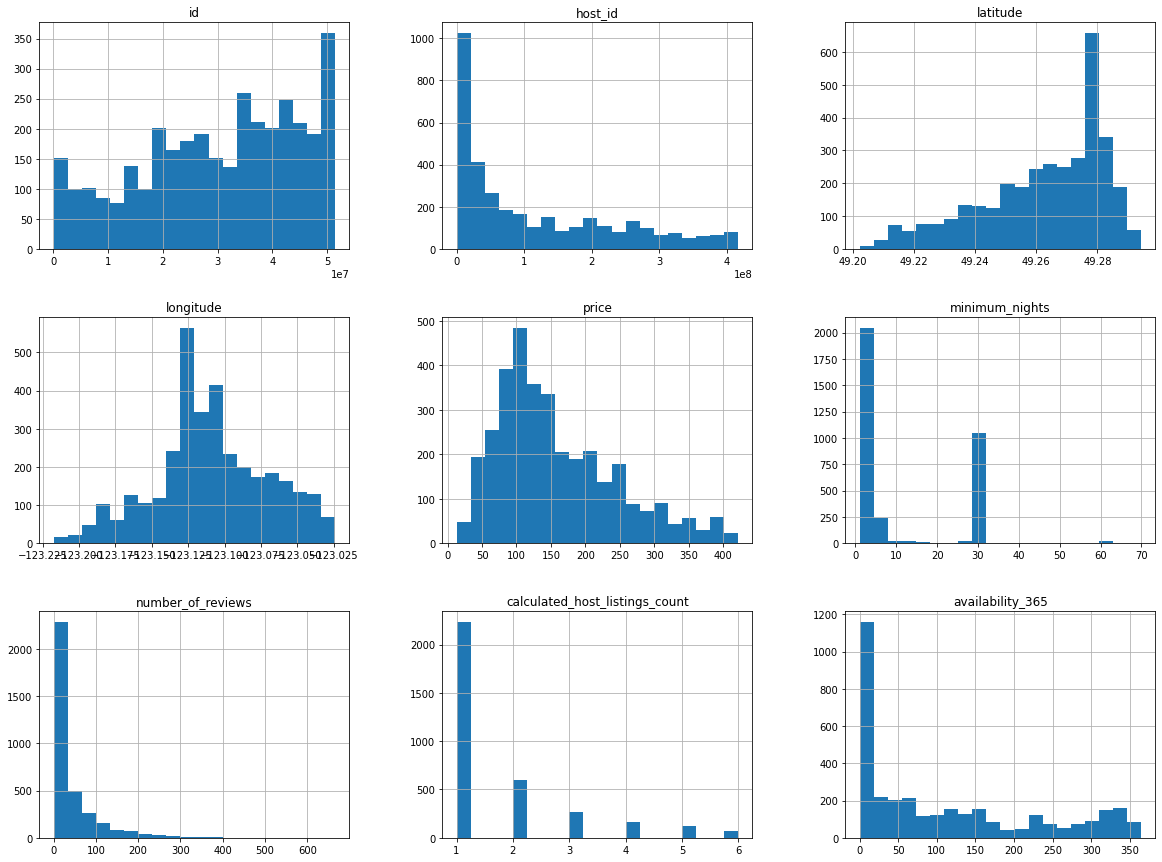

In [44]:
 # histogramas
df_clean.hist(bins=20, figsize=(20,15));

Após a limpeza dos dados, podemos verificar uma melhor distribuição nos histrogramas.

Um ponto que chamou a atenção foi com a variável `minimum_nights`, pela grande quantidade de entradas com 30 dias

Pesquisas mostraram que a cidade é muito procurada para gravação de filmes, possui um próspero cenário artístico, teatral e musical. Acredito que por conta das características desse tipo de trabalho, onde leva-se um tempo maior para a realização, isso possa estar relacionado a essa oferta por imóveis por essa quantidade de tempo.

In [31]:
# ver quantidade de valores igual a 30 dias para 'minimum_nights'
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights == 30])))
print("{:.2f}%".format((len(df_clean[df_clean.minimum_nights == 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30:
939 entradas
21.44%


In [15]:
# localidades com imóveis disponíveis com 'minimum_nights' igual a 30 dias
df_clean[['neighbourhood']].loc[df['minimum_nights'] == 30].value_counts()

neighbourhood           
Downtown                    311
West End                    100
Kitsilano                    88
Mount Pleasant               58
Kensington-Cedar Cottage     51
Downtown Eastside            39
Riley Park                   38
Renfrew-Collingwood          34
Grandview-Woodland           33
Fairview                     26
Marpole                      21
South Cambie                 21
Hastings-Sunrise             18
Dunbar Southlands            16
Sunset                       16
Oakridge                     15
Kerrisdale                   13
Shaughnessy                   8
Arbutus Ridge                 7
Killarney                     7
Strathcona                    7
Victoria-Fraserview           6
West Point Grey               6
dtype: int64

### **Q5. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price`
print('A média dos preços da cidade de Vancouver é de CAD$ {}.'.format(round(df_clean.price.mean())))

A média dos preços da cidade de Vancouver é de CAD$ 157.


### **Q6. Qual a correlação existente entre as variáveis**

Verificar se existe relação ou semelhança entre duas variáveis.

É a função de correlação estabelecer a intensidade da relação entre as variáveis.

In [17]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.189577,-0.016122,-0.137547,0.097383
minimum_nights,-0.189577,1.000000,-0.195268,0.149361,0.188175
number_of_reviews,-0.016122,-0.195268,1.000000,-0.104851,0.032877
calculated_host_listings_count,-0.137547,0.149361,-0.104851,1.000000,0.124416
availability_365,0.097383,0.188175,0.032877,0.124416,1.000000


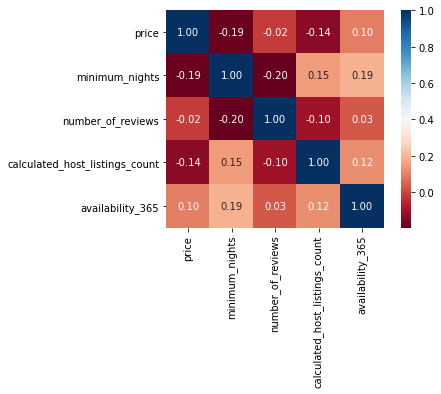

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` mostra o tipo de imóvel disponível no Airbnb.

Abaixo vamos contar a quantidade de cada tipo de imóvel disponível.

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2686
Private room        756
Shared room           9
Hotel room            5
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    77.719907
Private room       21.875000
Shared room         0.260417
Hotel room          0.144676
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Uma forma de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [21]:
# ver preços por bairros, na média
round(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])

neighbourhood
Downtown             193.0
West Point Grey      184.0
Downtown Eastside    184.0
Kitsilano            174.0
Shaughnessy          166.0
West End             166.0
Fairview             164.0
Strathcona           161.0
Mount Pleasant       158.0
Arbutus Ridge        154.0
Name: price, dtype: float64

In [22]:
# ver quantidade de imóveis em Downtown, West Point Grey, Downtown Eastside, Kitsilano, Strathcona
print('\nQuantidade de imóveis em Downtown: {} - {}% do total'.format(df_clean[df_clean.neighbourhood == "Downtown"].shape[0], 
                                                                      round(df_clean[df_clean.neighbourhood == "Downtown"].shape[0] / len(df_clean.neighbourhood) * 100 )))
print('\nQuantidade de imóveis em West Point Grey: {} - {}% do total'.format(df_clean[df_clean.neighbourhood == "West Point Grey"].shape[0], 
                                                                             round(df_clean[df_clean.neighbourhood == "West Point Grey"].shape[0] / len(df_clean.neighbourhood) * 100 )))
print('\nQuantidade de imóveis em Downtown Eastside: {} - {}% do total'.format(df_clean[df_clean.neighbourhood == "Downtown Eastside"].shape[0], 
                                                                               round(df_clean[df_clean.neighbourhood == "Downtown Eastside"].shape[0] / len(df_clean.neighbourhood) * 100 )))


Quantidade de imóveis em Downtown: 787 - 23% do total

Quantidade de imóveis em West Point Grey: 54 - 2% do total

Quantidade de imóveis em Downtown Eastside: 196 - 6% do total


Conforme pesquisas realizadas, e corroborada com os dados apresentados, Vancouver aparece no topo da lista das cidades mais caras do Canada para aluguel de imóveis.

Conforme mostrado na listagem, mesmo um bairro problemático, como ***Downtown Eastside***, o valor do aluguel indica um sobrepreço.

* O ***Downtown*** de Vancouver é o bairro mais próspero, moderno e popular, e muito procurado pelos jovens profissionais. Outra característica é sua agitada vida noturna, e durante o dia um movimentado centro de compras de boutiques de luxo e cadeias de loja. Apesar da grande quantidade de oferta de imóveis, pelas características apresentadas, o preço mais alto é justificado.

* O segundo resultado mostra o próspero bairro residencial ***West Point Grey***, conhecidos pelos parques praianos com vista para as montanhas. Bistrôs casuais, restaurantes e boutiques de modas criativos completam o comércio local. Por essas características e pela quantidade reduzidade de ofertas, justifica estar entre os preços mais altos.

* O terceiro resultado empatado com o segundo mostra uma situação interessante. ***Downtown Eastside*** é uma região na qual podemos chamar de "problemática" de Vancouver. É um local onde infelizmente está concentrada uma parcela muito alta de problemas relacionadas a uso de drogas, pobreza e prostituição. Pesquisando sobre a situação da região, foi verificado que existe um 'Plano Diretor' para a recuperação do local, e acredito que, junto com a proximidade e fácil acesso a outros bairros de Vancouver, isso pode ser uma justificativa para a alta do preço.

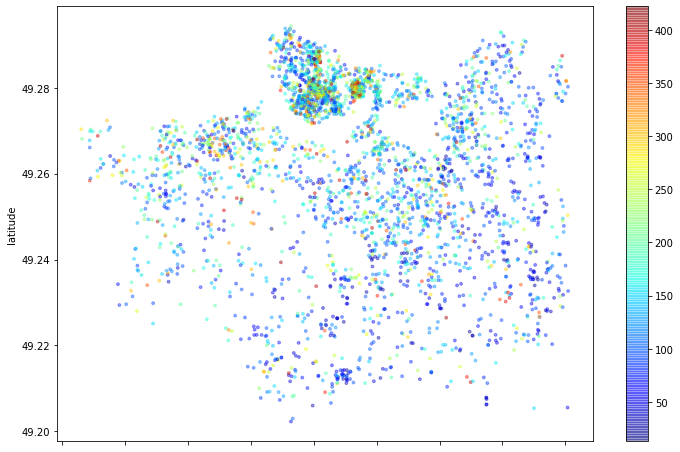

In [23]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [24]:
# ver a média da coluna minimum_nights
print('A média para aluguel é de {} noites.'.format(round(df_clean.minimum_nights.mean())))

A média para aluguel é de 12 noites.


## Conclusões

* Foi realizado apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu a presença de *outliers* em algumas variáveis.

* Em função da presença dos *outliers*, o *dataframe* foi limpado e calibrado para uma melhor observância dos dados.

* Com os dados apresentados, podemos corroborar com as pesquisas na web que Vancouver apresenta os valores de aluguel como mais caro do Canada, com uma média de CAD$ 154,00 (USD 121,78 / BRL 655,89).

* Obervamos que os bairros de ***Downtown*** e ***West Point Grey*** são as zonas mais caras para alugar no Airbnb em Vancouver.

Por fim, vale lembrar, que esse *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Esta análise pode ser aprofundada utilizando o conjunto de dados mais completo disponível no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


